## Observations and Insights

## Dependencies and starter code

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pym_merge_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
pym_merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
pym_mean_data = pym_merge_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
pym_median_data = pym_merge_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
pym_variance_data = pym_merge_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
pym_std_data = pym_merge_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
pym_SEM_data = pym_merge_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats_table = pd.DataFrame({"Mean Tumor Volume": pym_mean_data,
                                    "Median Tumor Volume": pym_median_data,
                                    "Variance Tumor Volume": pym_variance_data,
                                    "Standard Deviation Volume": pym_std_data,
                                    "SEM Volume": pym_SEM_data})

summary_stats_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Volume,SEM Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

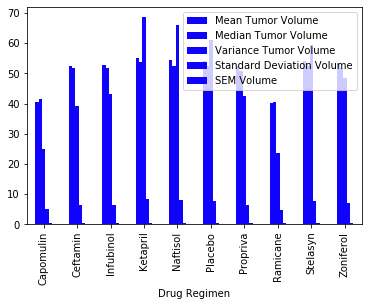

<Figure size 432x288 with 0 Axes>

In [57]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

summary_stats_table.groupby('Drug Regimen').sum().plot(kind='bar', color ='#0f03fc')

legend= None

plt.show()
plt.tight_layout()

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot


## Pie plots

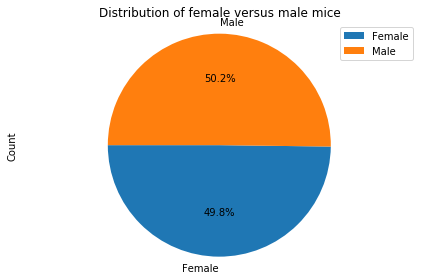

In [36]:
# generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_count = mouse_metadata.groupby("Sex")["Mouse ID"].count()
mice_gender_count = mice_gender_count.reset_index(name= 'Count')

mice_gender_pieplot = mice_gender_count.plot.pie(y= "Count", title= "Distribution of female versus male mice", 
                                             labels= mice_gender_count["Sex"], startangle= 180, autopct= '%1.1f%%')

plt.axis("equal")
plt.tight_layout()
plt.show()

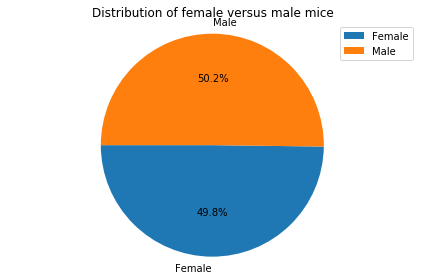

In [61]:
# generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender_count["Count"],labels= mice_gender_count['Sex'], startangle= 180, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.title("Distribution of female versus male mice")
plt.ylabel= 'Count'

plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen